In [1]:
import os
import scipy.misc
import numpy as np

from forward_model import DCGAN
from utils import pp, visualize, to_json, show_all_variables

import tensorflow as tf

from glob import glob
from ops import *
from utils import *

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#flags

flags = tf.app.flags
flags.DEFINE_integer("epoch", 15, "Epoch to train [20]") # changed to 20 from  25
flags.DEFINE_float("learning_rate", 0.0002, "Learning rate of for adam [0.0002]")
flags.DEFINE_float("beta1", 0.5, "Momentum term of adam [0.5]")
flags.DEFINE_integer("train_size", np.inf, "The size of train images [np.inf]")
flags.DEFINE_integer("batch_size", 16, "The size of batch images [64]")
flags.DEFINE_integer("input_height", 256, "The size of image to use (will be center cropped). [108]")
flags.DEFINE_integer("input_width", 320, "The size of image to use (will be center cropped). If None, same value as input_height [None]")
flags.DEFINE_integer("output_height", 256, "The size of the output images to produce [64]")
flags.DEFINE_integer("output_width", 320, "The size of the output images to produce. If None, same value as output_height [None]")
flags.DEFINE_string("dataset", "train_img_slices", "The name of dataset [celebA, mnist, lsun]")
flags.DEFINE_string("input_fname_pattern", "*.jpg", "Glob pattern of filename of input images [*]")
flags.DEFINE_string("checkpoint_dir", "checkpoint", "Directory name to save the checkpoints [checkpoint]")
flags.DEFINE_string("sample_dir", "samples", "Directory name to save the image samples [samples]")
flags.DEFINE_boolean("train", False, "True for training, False for testing [False]")
flags.DEFINE_boolean("crop", True, "True for training, False for testing [False]")
flags.DEFINE_boolean("visualize", False, "True for visualizing, False for nothing [False]")
FLAGS = flags.FLAGS

pp.pprint(flags.FLAGS.__flags)

if FLAGS.input_width is None:
    FLAGS.input_width = FLAGS.input_height
if FLAGS.output_width is None:
    FLAGS.output_width = FLAGS.output_height

if not os.path.exists(FLAGS.checkpoint_dir):
    os.makedirs(FLAGS.checkpoint_dir)
if not os.path.exists(FLAGS.sample_dir):
    os.makedirs(FLAGS.sample_dir)

#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
run_config = tf.ConfigProto()
run_config.gpu_options.allow_growth=True

{}


In [3]:
data = glob("./data/train_img_slices/*.ra")


sample_files = data[0:16]
sample = [get_image(sample_file,
                    input_height=256,
                    input_width=320,
                    resize_height=256,
                    resize_width=320,
                    crop=False,
                    grayscale=True) for sample_file in sample_files]

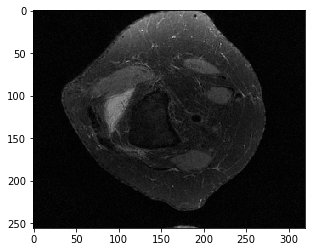

In [4]:
plt.imshow(sample[0], cmap ='gray')
plt.show()

In [5]:
v = np.reshape(sample, (16, 256*320))
# number of features per image (pixels including all channels)
print('shape of v: {}'.format(v.shape))


n = v.shape[1]

shape of v: (16, 81920)


In [6]:
import ra

from glob import glob
from ops import *
from utils import *
import os
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

data = glob("./masks/masks/*.ra")

img = ra.read_ra(data[3])
mag = abs(img)


In [10]:
mag = (mag > 0.5)*1.
the_mask = np.fft.fftshift(mag)
m = sum(sum(the_mask))

In [11]:
#kspace=np.zeros((16, 256, 320), dtype=complex)

kspace = np.fft.fft2(sample[0])
y = kspace[the_mask]  
np.shape(y)



#for i in range(16):
#    kspace[i] = np.fft.fft2(sample[i])
#y = kspace[:, the_mask]  
#np.shape(y)

(256, 320)

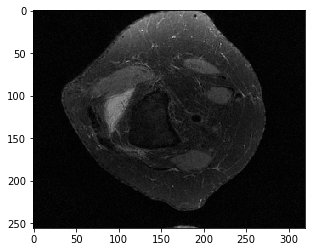

 [*] Reading checkpoints...
Instructions for updating:
Please use tf.global_variables instead.
z:0
generator/g_h0_lin/Matrix:0
generator/g_h0_lin/bias:0
generator/g_bn0/beta:0
generator/g_bn0/gamma:0
generator/g_bn0/moving_mean:0
generator/g_bn0/moving_variance:0
generator/g_h1/w:0
generator/g_h1/biases:0
generator/g_bn1/beta:0
generator/g_bn1/gamma:0
generator/g_bn1/moving_mean:0
generator/g_bn1/moving_variance:0
generator/g_h2/w:0
generator/g_h2/biases:0
generator/g_bn2/beta:0
generator/g_bn2/gamma:0
generator/g_bn2/moving_mean:0
generator/g_bn2/moving_variance:0
generator/g_h3/w:0
generator/g_h3/biases:0
generator/g_bn3/beta:0
generator/g_bn3/gamma:0
generator/g_bn3/moving_mean:0
generator/g_bn3/moving_variance:0
generator/g_h4/w:0
generator/g_h4/biases:0
discriminator/d_h0_conv/w:0
discriminator/d_h0_conv/biases:0
discriminator/d_h1_conv/w:0
discriminator/d_h1_conv/biases:0
discriminator/d_bn1/beta:0
discriminator/d_bn1/gamma:0
discriminator/d_bn1/moving_mean:0
discriminator/d_bn1/

InvalidArgumentError: No OpKernel was registered to support Op 'FFT2D' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[Node: FFT2D = FFT2D[](Cast)]]

Caused by op 'FFT2D', defined at:
  File "C:\Program Files\Anaconda3\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Program Files\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Program Files\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Program Files\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Program Files\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-d159ef8a9ebe>", line 58, in <module>
    g_kspace = tf.fft2d(tf.cast(dcgan.G[0],dtype=tf.complex64))
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_spectral_ops.py", line 152, in fft2d
    result = _op_def_lib.apply_op("FFT2D", input=input, name=name)
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): No OpKernel was registered to support Op 'FFT2D' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[Node: FFT2D = FFT2D[](Cast)]]


In [9]:
#possible_ms = [100, 500, 1000, 2000, 5000, 6000]
#num_iter = 750

possible_ms = [7500, 10000]
num_iter = 5
compressed_images = []

plt.imshow(sample[0], cmap='gray')
plt.show()


with tf.Session() as sess:

    #print(tf.global_variables())

    dcgan = DCGAN(
        sess,
        input_width=FLAGS.input_width,
        input_height=FLAGS.input_height,
        output_width=FLAGS.output_width,
        output_height=FLAGS.output_height,
        batch_size=FLAGS.batch_size,
        sample_num=FLAGS.batch_size,
        dataset_name=FLAGS.dataset,
        input_fname_pattern=FLAGS.input_fname_pattern,
        crop=FLAGS.crop,
        checkpoint_dir=FLAGS.checkpoint_dir,
        sample_dir=FLAGS.sample_dir)



    if not dcgan.load(FLAGS.checkpoint_dir)[0]:
        raise Exception("[!] Train a model first, then run test mode")

    dcgan.z.initializer.run()

    for i in range(1):
        #A1 = np.random.randn(n, m//2).astype('float32')
        #A1 = A1 / (np.sqrt(2) * np.sqrt( np.sum( A1**2, axis = 1 ) ))[:,None]
        #A2 = np.random.randn(n, m//2).astype('float32')
        #A2 = A2 / (np.sqrt(2) * np.sqrt( np.sum( A2**2, axis = 1 ) ))[:,None]
        
#         A_init = np.random.randn(n, m).astype('float32') 
#         A_init = A_init / np.sqrt( np.sum( A_init**2, axis = 1 ) )[:,None]
#         A_placeholder = tf.placeholder(tf.float32, shape=A_init.shape)
#         A = tf.Variable(A_placeholder)
        
        #A = np.random.randn(n, m).astype('float32')
        #A = A / np.sqrt( np.sum( A**2, axis = 1 ) )[:,None]
 
        
        #y = np.dot(v, A) 
        #y = np.hstack((np.dot(v, A1), np.dot(v, A2)))
        print('number of measurements = {}'.format(m))
        count = 0
        y_placeholder = tf.placeholder(tf.complex64,[None,m])
        
        g_kspace = tf.fft2d(tf.cast(dcgan.G[0],dtype=tf.complex64))
        g_kspace_samples = tf.boolean_mask(g_kspace,the_mask)
        
        # -----------------------------------
#         our_loss = tf.reduce_mean( tf.reduce_sum( (tf.matmul(tf.reshape(dcgan.G, [16, -1]) , A) - y_placeholder)**2, 1)) 
        our_loss = tf.reduce_mean( tf.reduce_sum( tf.abs(g_kspace_samples - y_placeholder)**2, 1)) 
        #our_loss = tf.reduce_mean( 
        #    tf.reduce_sum( (tf.concat ([tf.matmul(tf.reshape(dcgan.G, [16, -1]) , A1), 
        #                                 tf.matmul(tf.reshape(dcgan.G, [16, -1]) , A2)], axis=1) - y_placeholder)**2, 1))
        # -----------------------------------

        z_optim = tf.train.AdamOptimizer(learning_rate=0.1).minimize(our_loss, var_list=dcgan.z)  

        opt_initializers   = [var.initializer for var in tf.global_variables() if 'Adam' in var.name]
        beta1_initializers = [var.initializer for var in tf.global_variables() if 'beta1_power' in var.name]
        beta2_initializers = [var.initializer for var in tf.global_variables() if 'beta2_power' in var.name]

        sess.run(opt_initializers)
        sess.run(beta1_initializers)
        sess.run(beta2_initializers)


        for i in range(num_iter): 
            print('iteration {}'.format(count))
            a, closs, b = sess.run([z_optim, our_loss, dcgan.G],feed_dict={y_placeholder: y})
            count += 1
            print(closs)
        plt.imshow(b[0].reshape((256, 320)), cmap='gray')
        compressed_images.append(b)
        plt.show()

In [ ]:
errors = []
for image_num in range(10):
    meas_err = []
    plt.figure()
    plt.title("original")
    plt.imshow(sample[image_num], cmap='gray') 
    plt.axis('off')

    fig = plt.figure()
    for i in range(len(compressed_images)):
        im = fig.add_subplot(2, len(compressed_images) / 2, i + 1)
        plt.imshow((compressed_images[i][image_num].reshape((256, 320))), cmap = 'gray')
        plt.axis('off')
        meas_err.append(np.sum((sample[image_num] - compressed_images[i][image_num].reshape((256, 320)))**2))
    #print(meas_err)
    errors.append(meas_err)

    for i in range(len(compressed_images)):
        plt.figure()
        plt.title(possible_ms[i])
        plt.imshow((compressed_images[i][image_num].reshape((256, 320))), cmap='gray')
        plt.axis('off')
        plt.figure()
    plt.title("original")
    plt.imshow(sample[image_num], cmap='gray') 
    plt.axis('off')

In [ ]:
plt.plot(possible_ms, np.mean(errors, axis=0) / (256.0*320.0), '--ro')
plt.title("Average training pixel error vs num measurements")
plt.show()